In [1]:
import numpy as np
import sys
import os
sys.path.append(os.path.join(os.getcwd(),"../Algorithm encapsulation"))
sys.path.append(os.path.join(os.getcwd(),".."))
print(sys.path)
from LMband import LMband
import pandas as pd
from ga_platoon import max_dt

['f:\\workspace\\jupyter\\论文\\graduation thesis\\Case Analysis', 'd:\\anaconda\\envs\\cplex\\python37.zip', 'd:\\anaconda\\envs\\cplex\\DLLs', 'd:\\anaconda\\envs\\cplex\\lib', 'd:\\anaconda\\envs\\cplex', '', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\chardet-3.0.4-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\docloud-1.0.375-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\urllib3-1.25.11-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\fonttools-4.36.0-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\cvxopt-1.3.0-py3.7-win-amd64.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\pytz-2022.2.1-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\win32', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\win32\\lib', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\Pythonwin', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\0\\.ipython', 'f:\\wor

In [2]:
def get_rf(d,p):
    tmp=[]
    for i,a in enumerate(p):
        idx=np.where(a!=0)[0]
        a=a&0
        if len(idx)>0:
            a[:idx[0]]=1
        tmp.append((d[i]*a).sum())
    return tmp

In [3]:
phase = np.loadtxt("./data/phase")
cir=phase[0].sum()
phase=phase/cir
vol = np.loadtxt("./data/volume")
qv = np.loadtxt("./data/path_vol")
phase_get = np.load("./data/phase_get.npy")
d = np.loadtxt("./data/distance")
straight_get = np.load("./data/straight_get.npy")
ison = np.array([0, 0, 0, 1, 1, 1])
px = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
pxb = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
qb=[120,120]
lower, upper = 8, 14
linspace = np.arange(lower, upper, 1)
lin_num = len(linspace)

# 南北直行方向绿灯时间
sg=np.array([(straight_get[i]*phase).sum(axis=1) for i in range(len(straight_get))])
rho = vol[0] / vol[1]
num = len(vol[0])
numr = len(qv)
nump = len(phase_get)
M = 1e6
nx = 0.00000001
be = 8
speedScope = np.array([lower, upper])
speedVar = np.array([-2, 2])

g=np.array([(phase_get[i]*phase).sum(axis=1) for i in range(numr) ])
r=1-g
rf=np.array([get_rf(phase,phase_get[i]) for i in range(numr)])

ex=[1,0,1,0,1,0,1,1,1,1,1,0]
dwt=15
qb_x=np.ones_like(sg)*20
cap=np.ones_like(sg,dtype=int)*3

spd_on=pd.read_csv(os.path.join(os.getcwd(),"..","speed analysis","上行速度数据.csv"),index_col=0)
spd_in=pd.read_csv(os.path.join(os.getcwd(),"..","speed analysis","下行速度数据.csv"),index_col=0)

In [4]:
lmb=LMband(phase, [80,180], vol, qv, phase_get, d, straight_get, ison, px, pxb, qb,qb_x,cap, lower, upper, 
           linspace, be, speedVar[0], speedVar[1],ex, dwt,lower,upper,speedVar[0], speedVar[1],spd_on,spd_in)
lmb._M1_solve()

Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125

Multi-objective solve log . . .

Index  Priority  Blend          Objective      Nodes  Time (sec.)  DetTime (ticks)

Performing restart 1
    1         0      3   1.8325282998e+04      12051         1.53          1085.64
status  = multi-objective optimal
time    = 1.531 s.
problem = MILP
gap     = 2.55053e+73%

object value: 3921


In [5]:
lmb._M2_solve()

M1 2962.7910084735804 957.96
M1 2962.7910084735804 957.96
M1 2962.7910084735804 957.96
M1 2962.7910084735804 957.96
M1 2962.7910084735804 957.96
M1 2962.7910084735804 957.96
M1 2962.7910084735804 957.96
M1 2962.7910084735804 957.96
M1 2962.7910084735804 957.96
[[array([0.0185, 0.0806, 0.1632, 0.1535, 0.0671, 0.0136]), array([0.0002, 0.0044, 0.0368, 0.1279, 0.1859, 0.113 ]), array([0.0096, 0.0268, 0.0562, 0.0888, 0.1058, 0.0951]), array([0.    , 0.    , 0.0014, 0.0192, 0.1002, 0.1951])], [array([0.0096, 0.0579, 0.1523, 0.1736, 0.0858, 0.0184]), array([0.0035, 0.0403, 0.1545, 0.2003, 0.0877, 0.013 ]), array([0.    , 0.0003, 0.0093, 0.0888, 0.2242, 0.1497]), array([0.0002, 0.0057, 0.0525, 0.1686, 0.1887, 0.0737])]]
conflict(s): 0
Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125

Multi-objective solve log . . .

Index  Priority  Blend          Objective      Nodes  Time (sec

In [6]:
a=lmb.get_dataframe()
a

M2 0 918.4799976856135
M1 2962.7910084735804 957.96


,cross_number,distance,b1,b2,b3,b4,b5,b6,offset,p,...,u3,u4,u5,u6,bb1,bb2,dw1,dw2,tb1,tb2
0,1.0,800.0,26.425850,26.425849,0.000000,30.494816,0.000000,30.923867,0.000000,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,26.425850,30.923867,15.000000,15.000000,100.000000,72.142857
1,2.0,520.0,24.364258,24.364259,0.000000,30.923867,0.000000,30.923867,6.291313,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,24.364258,30.923867,15.000000,15.000000,60.479625,54.219807
2,3.0,500.0,24.364258,24.364258,0.000000,21.552998,0.000000,21.552998,67.801734,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,24.364258,21.552998,15.000000,15.000000,60.906952,54.963839
3,4.0,490.0,23.895715,23.895716,0.000000,21.552998,0.000000,21.552998,35.000000,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,23.895715,21.552998,15.000000,15.000000,58.474415,36.030796
4,5.0,370.0,23.895715,23.895715,0.000000,23.895715,0.000000,23.895715,93.708687,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,23.895715,23.895715,40.008469,15.000000,86.258469,46.250000
5,6.0,254.0,43.328892,38.336258,43.328887,115.900314,0.000000,115.900314,55.088161,1.0,...,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,43.328886,115.900316,15.000000,15.000000,18.142857,18.142857
6,7.0,585.0,43.328887,38.336258,43.328887,43.328887,0.000000,43.328887,73.231019,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,43.328887,43.328885,15.000000,32.058178,73.125000,105.183178
7,8.0,1020.0,15.982825,0.000000,15.982825,0.000000,24.216401,0.000000,83.285411,1.0,...,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,15.982825,15.982825,15.000000,33.016925,87.857143,105.874067
8,9.0,409.0,10.945306,0.000000,28.865950,0.000000,24.216401,0.000000,67.835385,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,28.865950,15.982825,15.000000,15.000000,44.214286,52.651318
9,10.0,547.0,46.959757,0.000000,46.959757,46.959757,46.959757,0.000000,14.404373,1.0,...,1.000000e-08,1.000000e-08,-3.819913e-08,1.000000e-08,46.959757,46.959757,15.000000,15.000000,54.071429,75.251693


M2 0 918.4799976856135
M1 2962.7910084735804 957.96
M2 0 918.4799976856135


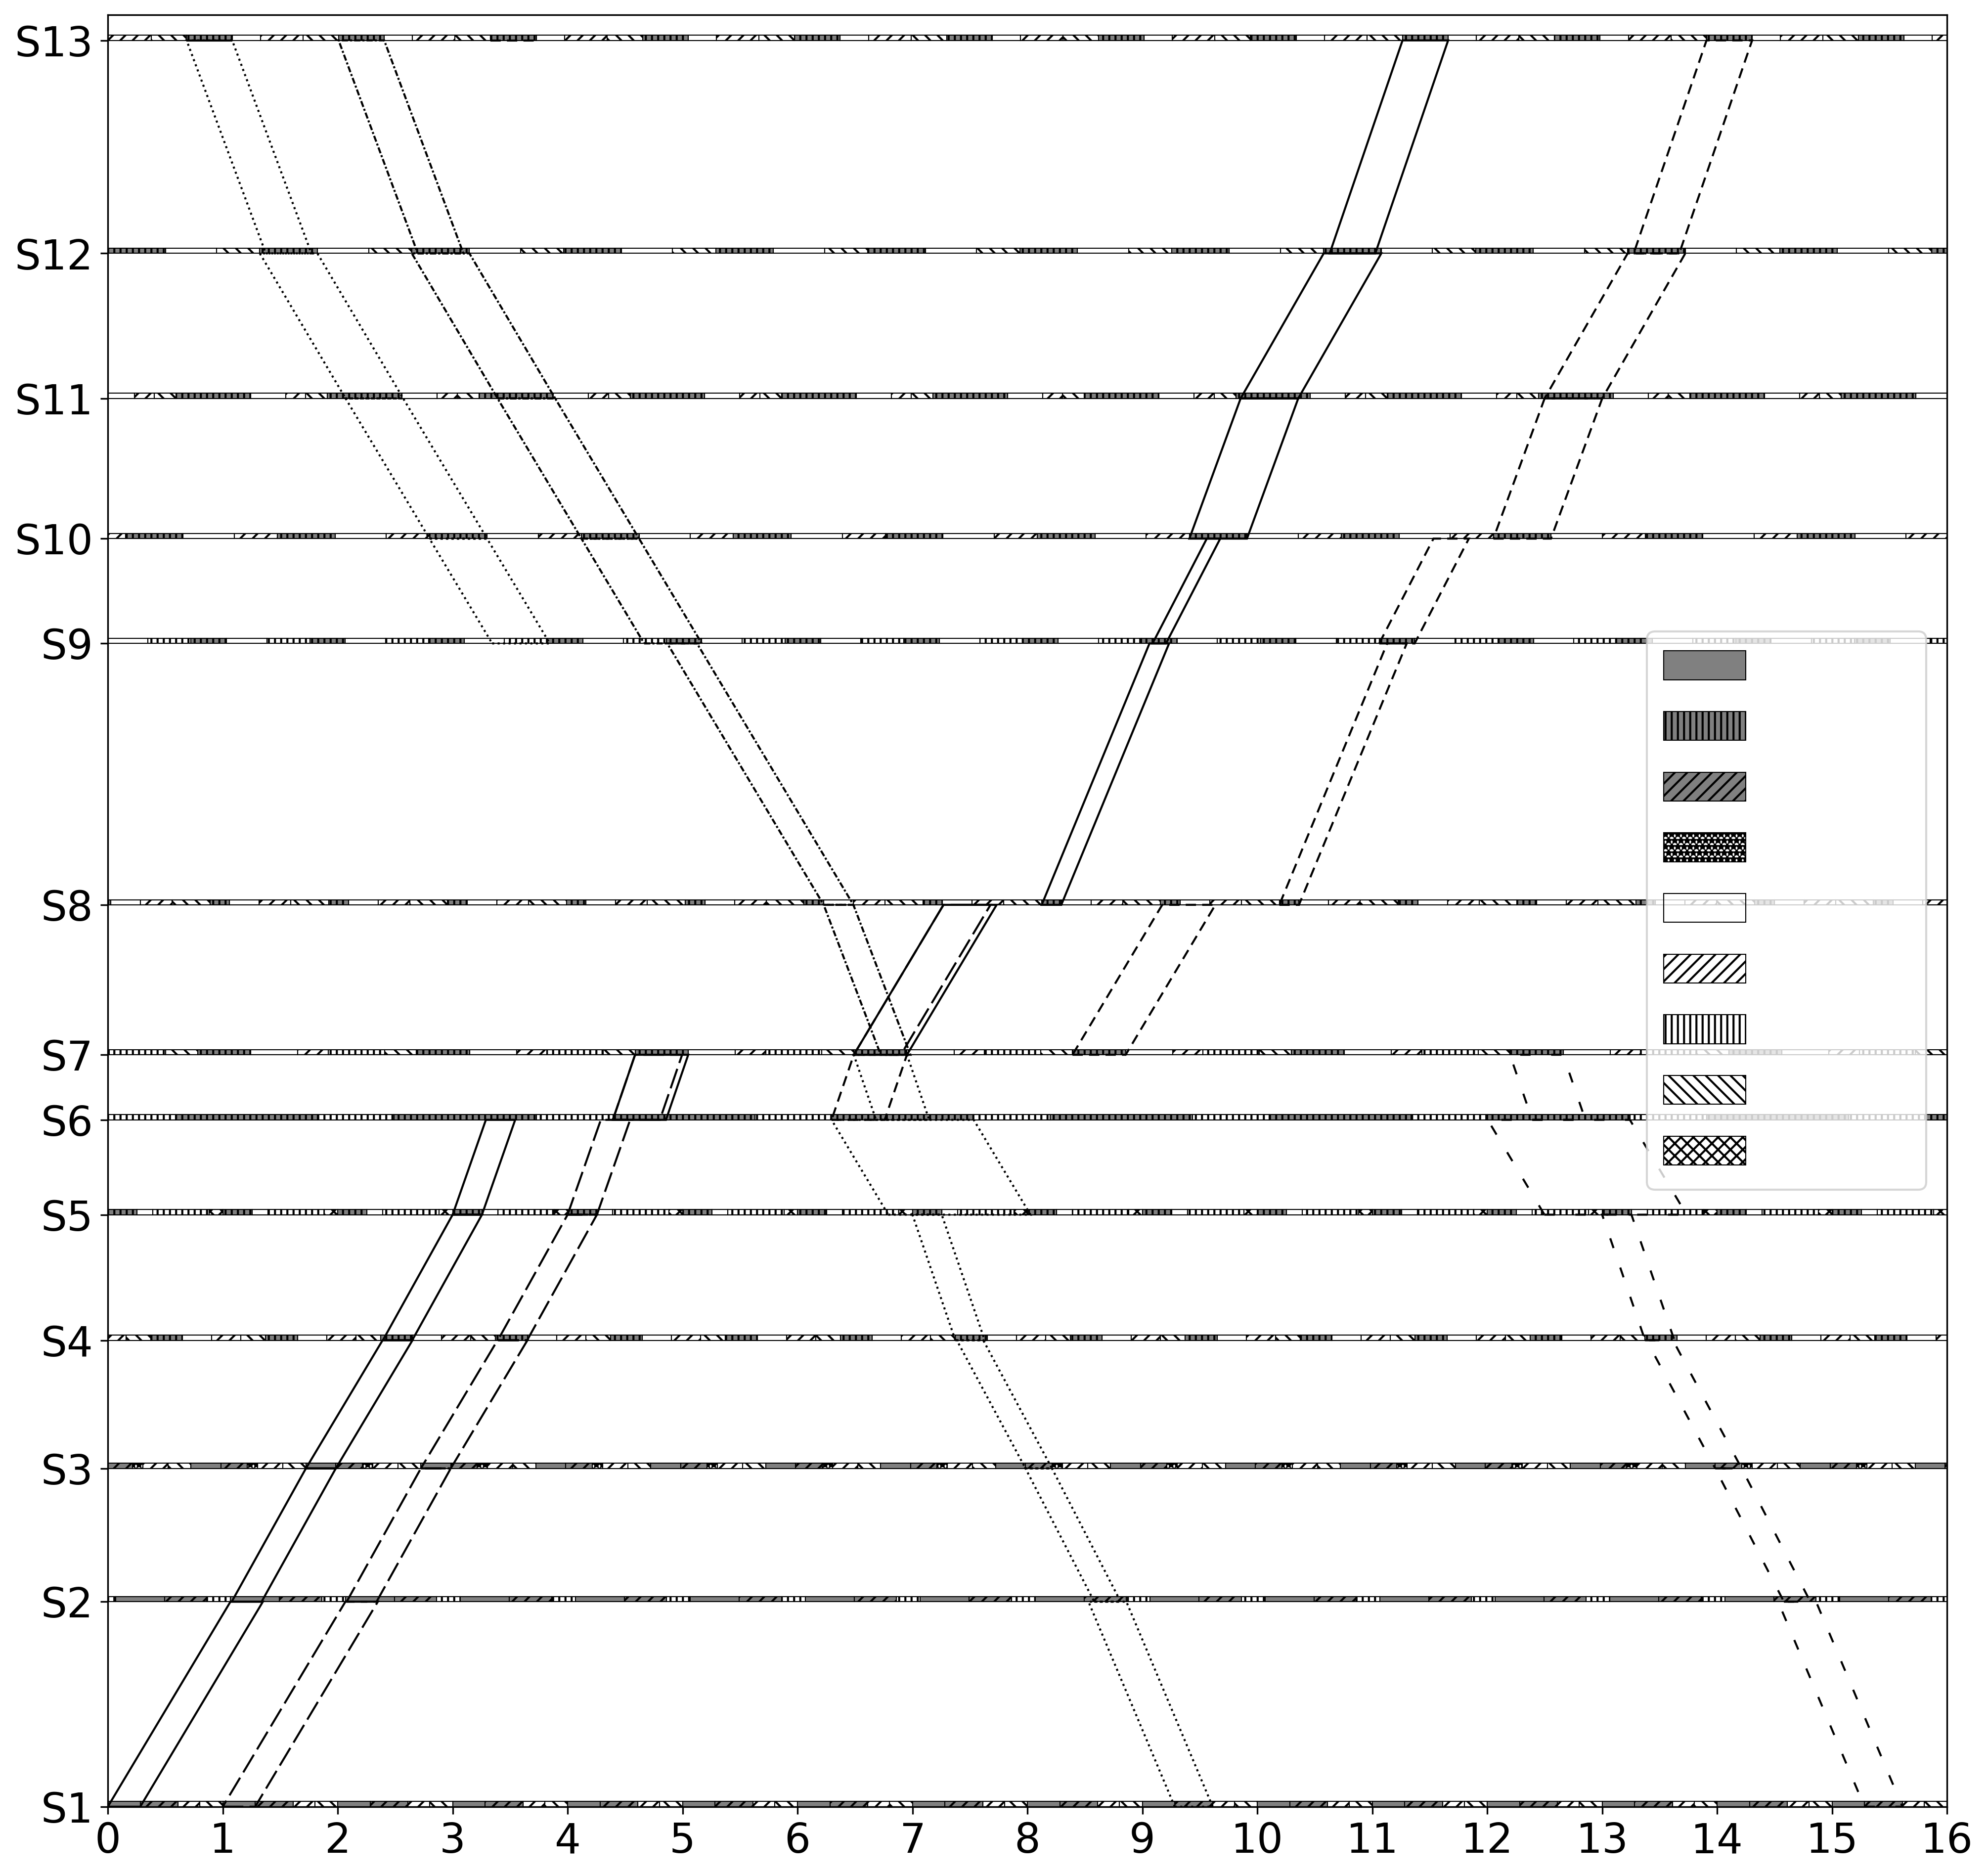

In [7]:
colors=[
            {"color":"gray" , "hatch": None, "fill": True},
            {"color":"gray", "hatch":"||||" , "fill": True},
            {"color": "gray", "hatch":"////" , "fill": True},
            {"color":"white", "hatch": "****", "fill": False},
            {"color": "white", "hatch": None, "fill": False},
            {"color": "white", "hatch": "////", "fill": False},
            {"color": "white", "hatch": "||||", "fill": False},
            {"color": "white", "hatch": "\\\\\\\\", "fill": False},
            {"color": "white", "hatch": "xxxx", "fill": False},
            {"color": "white", "hatch": "....", "fill": False},
        ]
linestyles=[
    {"linestyle":"-" },
    {"linestyle":(5,(10,3))},
    {"linestyle":(0, (5, 3)) },
    {"linestyle":":" },
    {"linestyle":(0, (3, 1, 1, 1))  },
    {"linestyle": (0, (5, 10)) },
]
legends=["1->15", "1->6", "8->15", "15->2", "14->9", "7->1"]
lmb.draw_car_bound("./时距图",colors,legends,2,linestyles)

M2 0 918.4799976856135
M1 2962.7910084735804 957.96
M2 0 918.4799976856135
1422.2461230632632 15.17731360702946


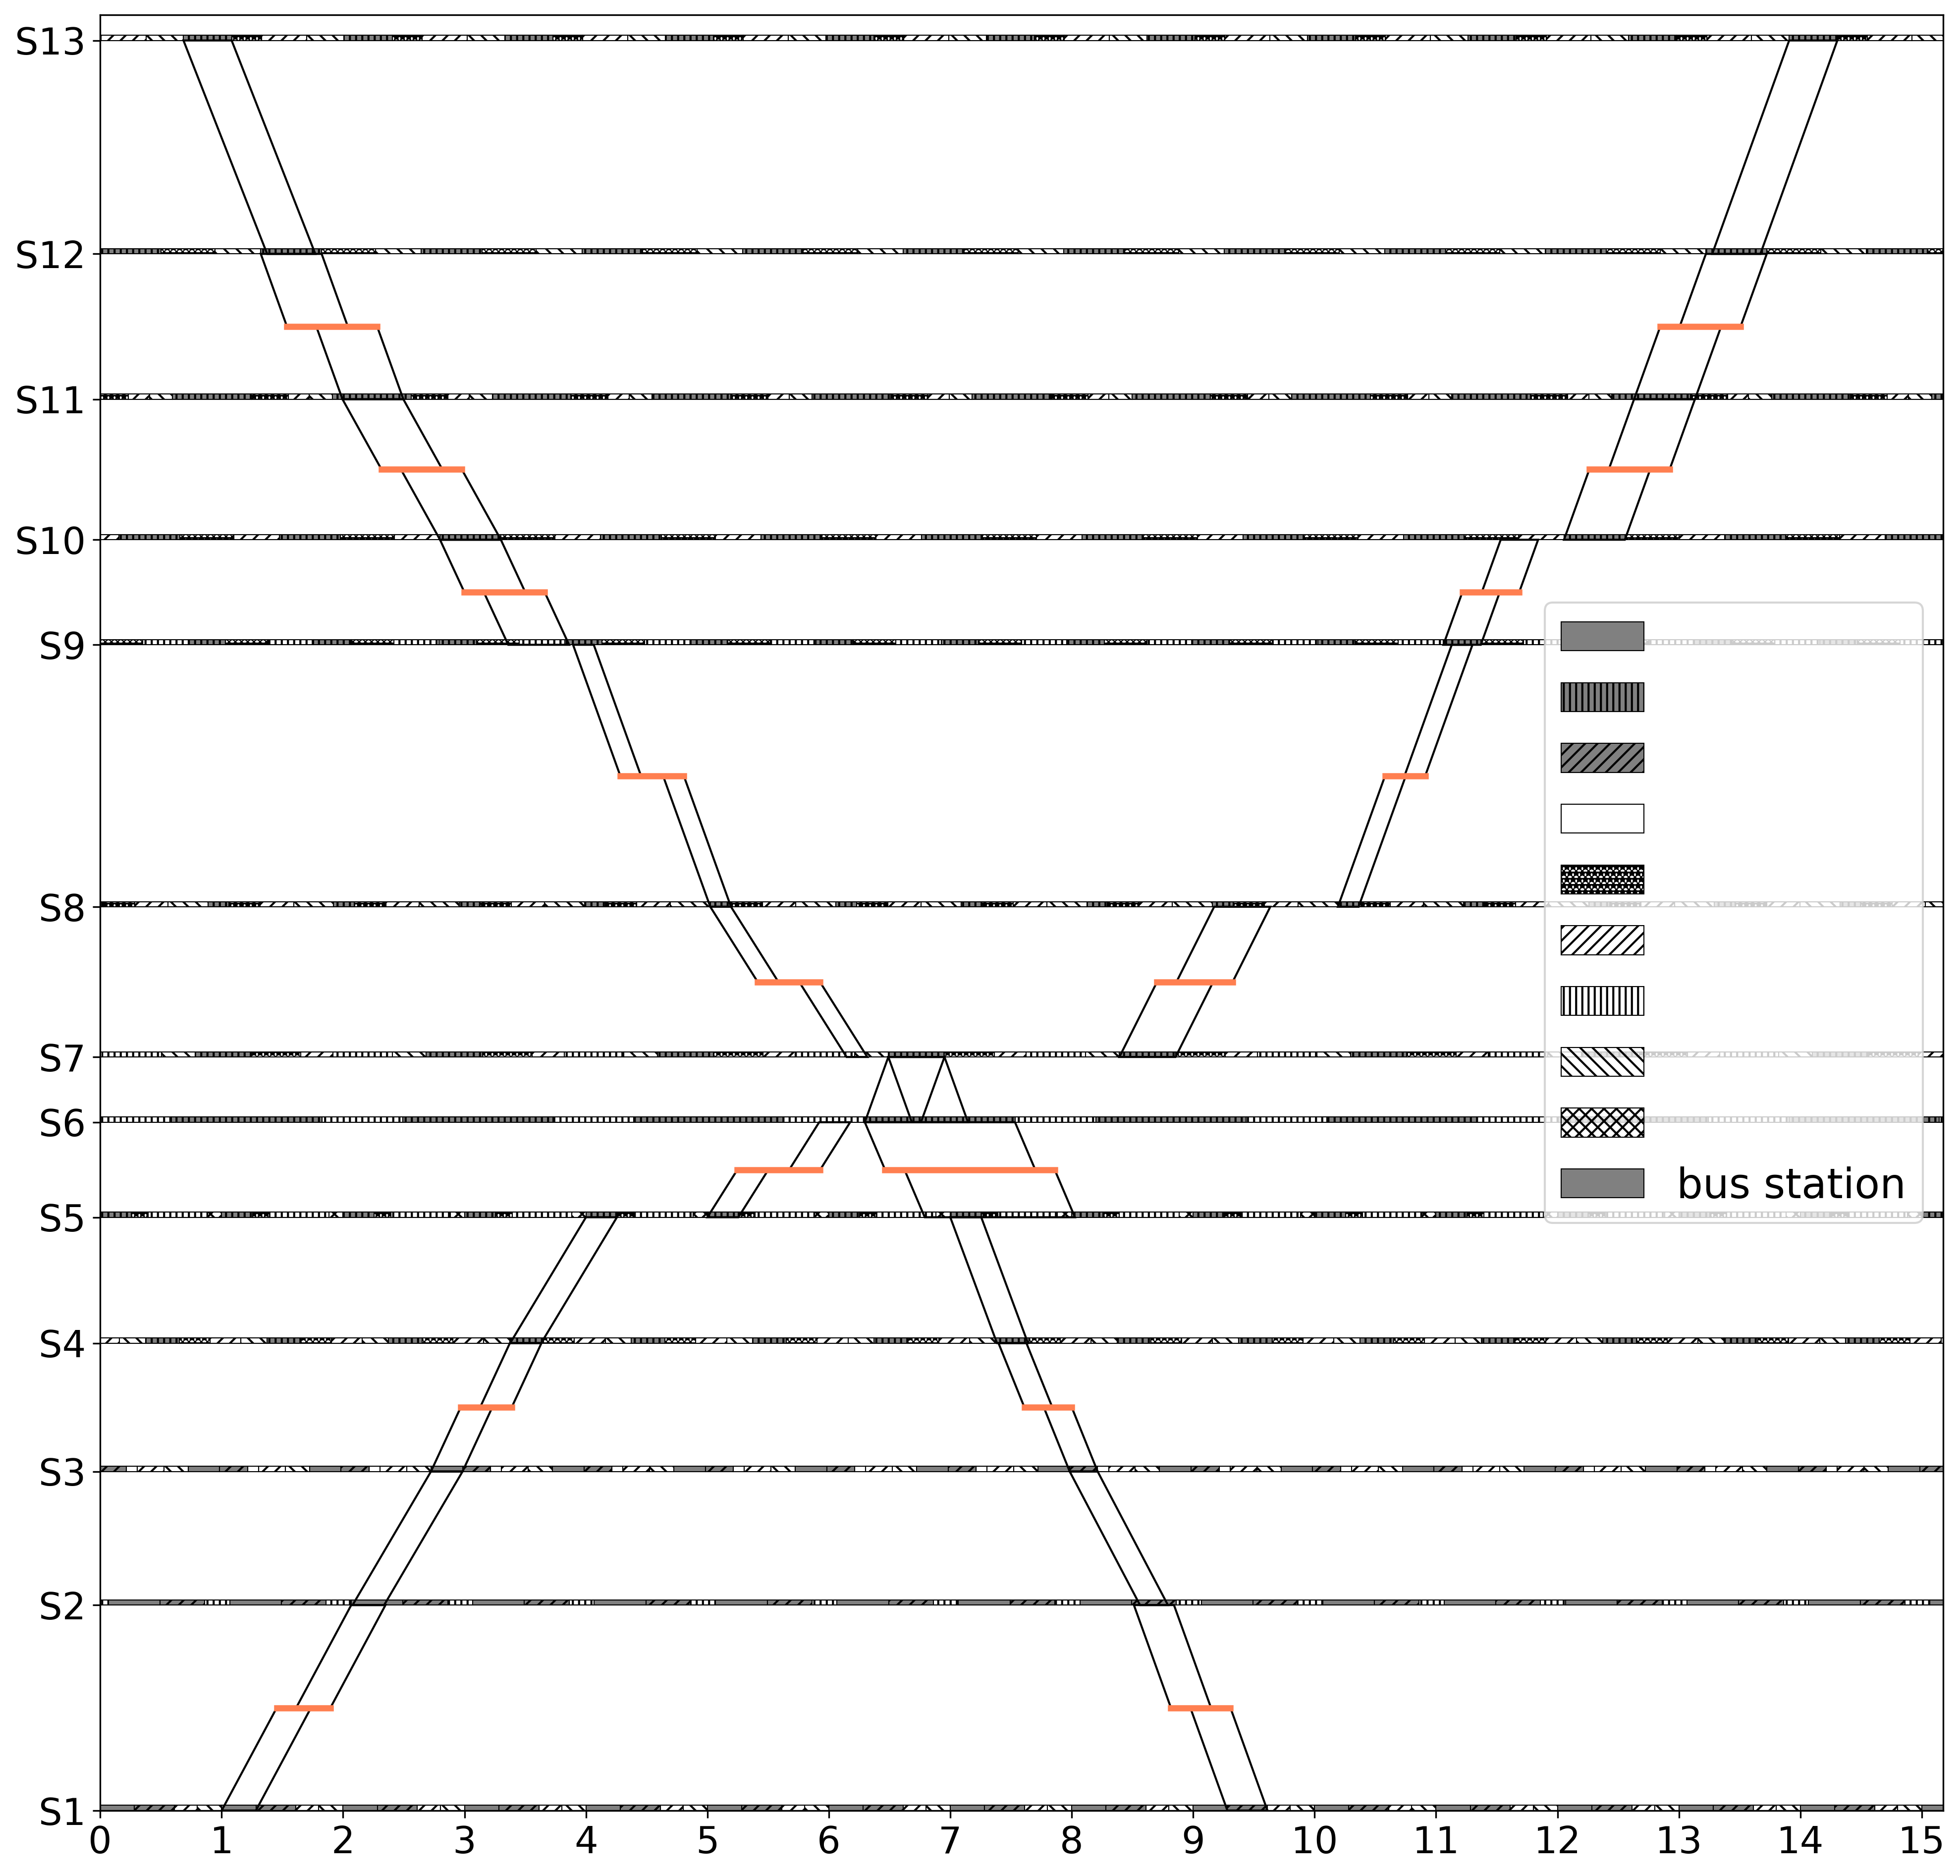

In [8]:
colors=[
            {"color":"gray" , "hatch": None, "fill": True},
            {"color":"gray", "hatch":"||||" , "fill": True},
            {"color": "gray", "hatch":"////" , "fill": True},
            {"color":"white", "hatch": None, "fill": False},
            {"color": "white", "hatch": "****", "fill": False},
            {"color": "white", "hatch": "////", "fill": False},
            {"color": "white", "hatch": "||||", "fill": False},
            {"color": "white", "hatch": "\\\\\\\\", "fill": False},
            {"color": "white", "hatch": "xxxx", "fill": False},
            {"color": "white", "hatch": "....", "fill": False},
        ]
lmb.draw_bus_bound("./公交时距图",colors)

In [9]:
from  SimAnalysis import SimAnalysis

In [16]:
df=lmb.get_dataframe()
sim=SimAnalysis(df,phase,ex,os.path.join(os.getcwd(),"..","vissim","aa","zhongsan.inp"),
               os.path.join(os.getcwd(),"..","vissim","aa","vissim.ini"),
               os.path.join(os.getcwd(),"..","vissim","aa","zhongsan - 副本.inp"))
sim.start()
spdx=sim.analysis_speed(os.path.join(os.getcwd(),"..","vissim","aa","zhongsan - 副本.fzp"))
delayx=sim.analysis_delay(os.path.join(os.getcwd(),"..","vissim","aa",'zhongsan - 副本.vlz'))
tvltx=sim.analysis_traveltime(os.path.join(os.getcwd(),"..","vissim","aa",'zhongsan - 副本.rsz'))

M2 0 918.4799976856135
M1 2962.7910084735804 957.96


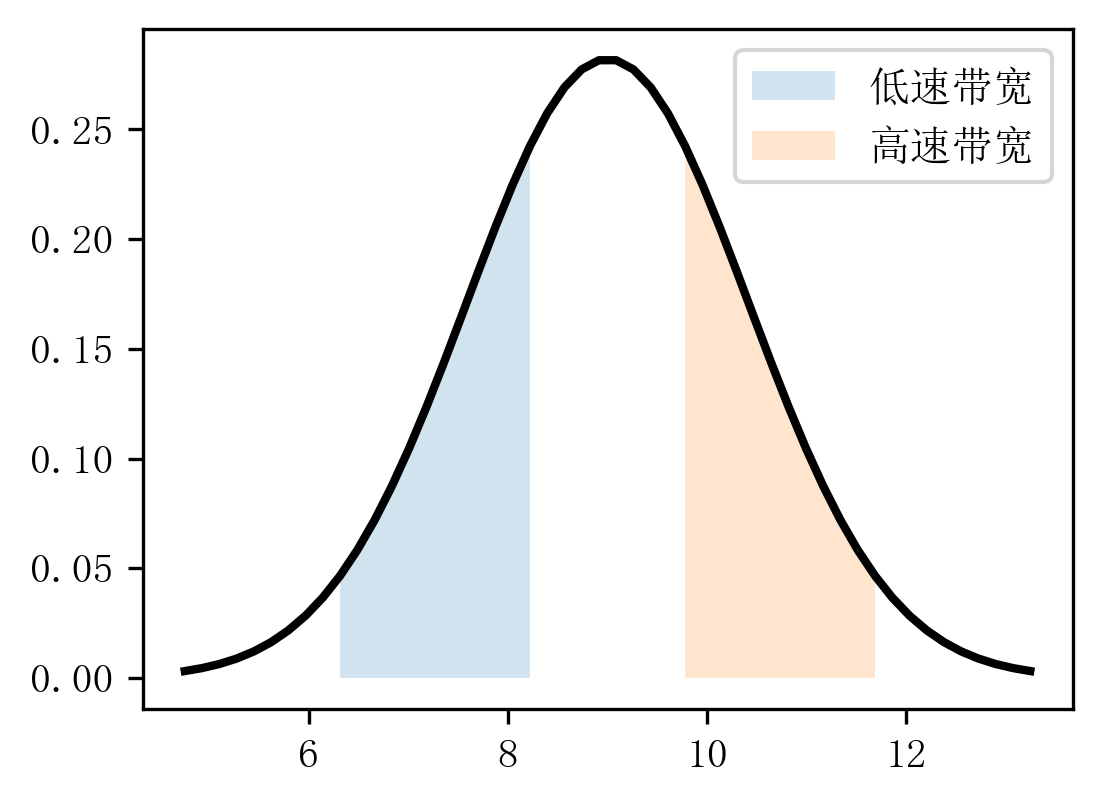

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']="SimSun"
fig = plt.figure(figsize=(4,3), dpi=300)
u = 9   # 均值μ
sig = math.sqrt(2)  # 标准差δ
x = np.linspace(u - 3*sig, u + 3*sig, 50)   # 定义域
y = np.exp(-(x - u) ** 2 / (2 * sig ** 2)) / (math.sqrt(2*math.pi)*sig) # 定义曲线函数
plt.plot(x, y, "black", linewidth=2)    # 加载曲线
l1=plt.fill_between(x, y, 0,where=((x>=u-2*sig)&(x<=u-sig/2)), alpha=0.2)
l2=plt.fill_between(x, y, 0,where=((x<=u+2*sig)&(x>=u+sig/2)), alpha=0.2)
# plt.grid(True)  # 网格线
plt.legend([l1,l2],["低速带宽","高速带宽"])
plt.show()  # 显示
fig.savefig("./正态分布")